J. Manuel Garcia
CSPM Predictor

Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model 
from scipy.stats import skew
%matplotlib inline

Get access to our google drive folders


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/IA'
!ls

/content/drive/MyDrive/IA
CSPM_Predictor.ipynb  Datalol.csv


In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)


Dataset visualization

In [5]:
datalol = pd.read_csv('Datalol.csv')
datalol.head()

,KDA,KP,FB%,CSD10,CSPM,CS%P15,DTH%,GOLD%,DMG%,DPM
0,3.8,0.55,0.00,2.4,8.5,0.23,0.14,0.23,0.21,456
1,3.4,0.66,0.17,3.3,9.1,0.30,0.18,0.26,0.28,549
2,3.6,0.67,0.28,1.3,9.1,0.29,0.18,0.25,0.25,498
3,2.7,0.54,0.10,2.0,9.2,0.27,0.13,0.25,0.24,353
4,5.3,0.60,0.18,2.6,9.8,0.30,0.17,0.27,0.31,513


In [6]:
datalol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KDA     232 non-null    float64
 1   KP      232 non-null    float64
 2   FB%     232 non-null    float64
 3   CSD10   232 non-null    float64
 4   CSPM    232 non-null    float64
 5   CS%P15  232 non-null    float64
 6   DTH%    232 non-null    float64
 7   GOLD%   232 non-null    float64
 8   DMG%    232 non-null    float64
 9   DPM     232 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.2 KB


Correlation graphs

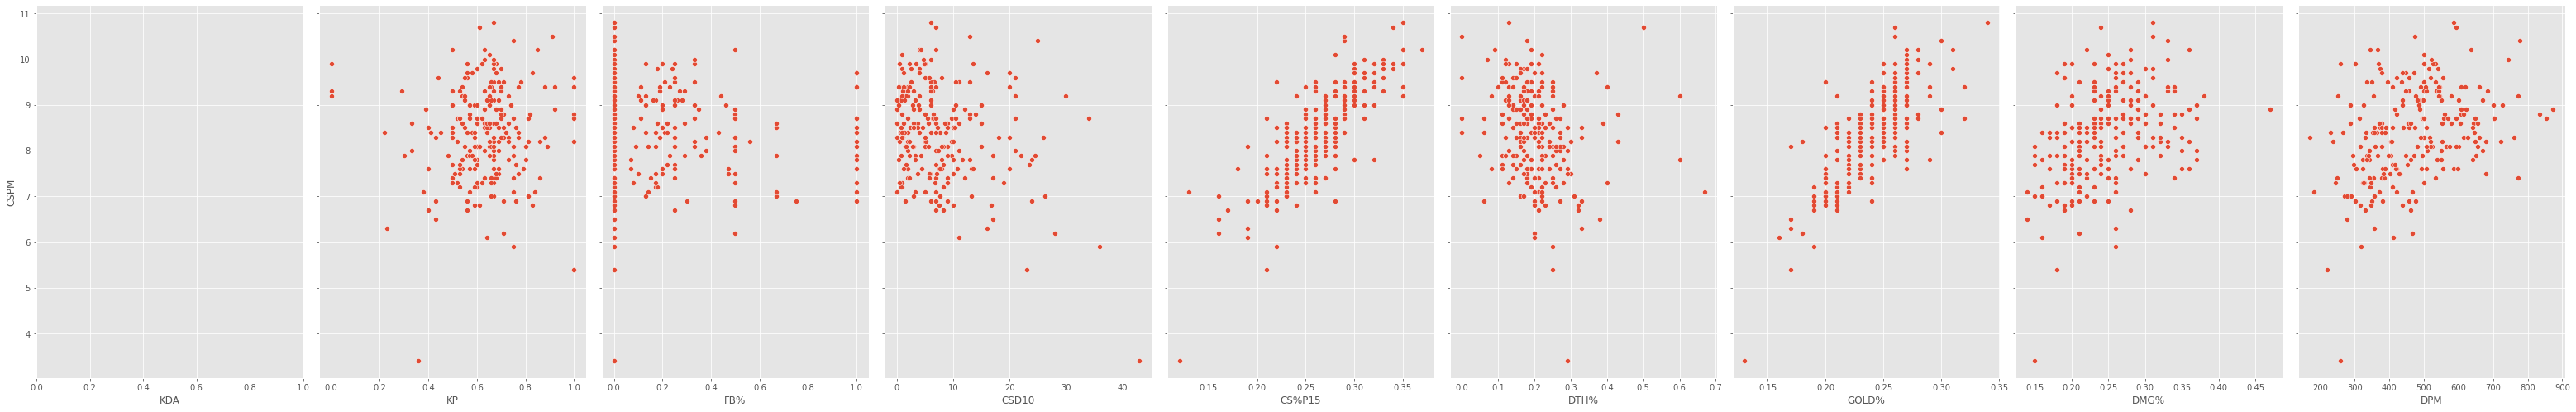

In [7]:
sns.pairplot(datalol, x_vars=['KDA','KP','FB%','CSD10','CS%P15', 'DTH%', 'GOLD%', 'DMG%', 'DPM'], y_vars='CSPM', height=7, aspect=0.7)

Correlation coeficients

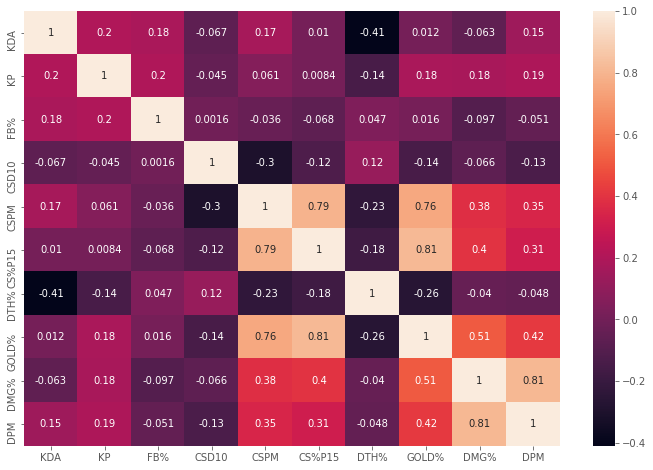

In [8]:
sns.heatmap(datalol.corr(), annot=True)

How our current model fit our data?

In [9]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = datalol[['CS%P15','GOLD%', 'DMG%', 'DPM', 'KDA']]
y = datalol.CSPM

lm2 = LinearRegression().fit(X[['CS%P15','GOLD%', 'DMG%', 'DPM']], y)
lm2_preds = lm2.predict(X[['CS%P15','GOLD%', 'DMG%', 'DPM']])

print("R^2 " ,r2_score(y, lm2_preds))

R^2  0.6720123779938112


Let's try it with one more X

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lm3 = LinearRegression().fit(X[['CS%P15','GOLD%', 'DMG%', 'DPM','KDA']], y)
lm3_preds = lm3.predict(X[['CS%P15','GOLD%', 'DMG%', 'DPM', 'KDA']])

print("R^2 " ,r2_score(y, lm3_preds))

R^2  0.6928539199876627


Root mean square error with one more X


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = datalol[['CS%P15','GOLD%', 'DMG%', 'DPM','KDA' ]]
y = datalol.CSPM

X_train, X_test, y_train, y_test, = train_test_split(X,y, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2 ", r2_score(y_test, lm4_preds))

RMSE  0.6336883793543457
R^2  0.5464690260259888


RMSE with our final model and our final X's

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = datalol[['CS%P15','GOLD%', 'DMG%', 'DPM']]
y = datalol.CSPM

X_train, X_test, y_train, y_test, = train_test_split(X,y, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2 ", r2_score(y_test, lm4_preds))

RMSE  0.6050913077558205
R^2  0.5464690260259888


Visualization of our final model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


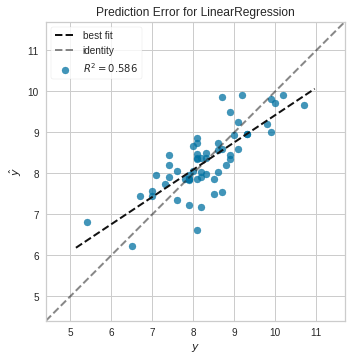

In [13]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Cross validation


In [14]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(lm5, X, y)
print('MCV: %.2f' % np.mean(acc))


MCV: 0.59


User Testing

In [15]:
CSAT15 = float(input("Input the CS AT 15MIN MARK "))
GOLD  = float(input("Input the GOLD% "))
DMG = float(input("Input the DMG% "))
DPM = float(input("Input the DPM "))

testpredict = lm5.predict([[CSAT15, GOLD, DMG, DPM]])
print(testpredict)



Input the CS AT 15MIN MARK 0.30
Input the GOLD% 0.25
Input the DMG% 0.22
Input the DPM 459
[8.98967311]
